link dashboard : https://lookerstudio.google.com/reporting/c5a7223f-683c-4c90-8bf0-20c62c28bf67

## i. Perkenalan

Nama: Satriya Fauzan Adhim

Batch: 019

## ii. Identifikasi Masalah

### Problem Statement

Mengetahui perkiraan gaji untuk profesi data scientist di dunia untuk tahun 2023

### Penjabaran Masalah



*   Distribusi profesi bidang data science 
*   Distribusi dari masing-masing data
*   Bagaimana distribusi gaji untuk bidang data science
*   Bagaimana tren kenaikan gaji pada posisi data science dari waktu ke waktu
*   Apa pekerjaan data science dengan gaji tertinggi
*   Rata2 gaji berdasarkan lokasi
*   Apa bidang data science yang paling banyak
*   Bagaimana trend gaji dari profesi Data Scientist
*   Central tendency dari data yang ingin diteliti
*   Mengatasi outlier dari data apabila ada
*   Berapa Confidence interval dari data pekerjaan data scientist



## iii. Data Loading

In [1]:
## Import

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

link dataset kaggle : https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"satriyafauzan","key":"6112629deafb3bdf45212a4c2a9bd75a"}'}

In [ ]:
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d arnabchaki/data-science-salaries-2023
!unzip data-science-salaries-2023.zip

  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 14.0MB/s]
Archive:  data-science-salaries-2023.zip
  inflating: ds_salaries.csv         


In [3]:
##Load Data

df = pd.read_csv('/content/ds_salaries.csv')

df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


## iv. Data Cleaning

In [6]:
# Mencopy dataframe
df1 = df.copy()

In [7]:
# Pecarian jumlah dari missing values yang ada
df1.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
print(df1.dtypes)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [9]:
df1[['experience_level','employment_type', 'job_title', 'company_size' ]] = df[['experience_level','employment_type', 'job_title', 'company_size' ]].astype('category')

In [10]:
print(df1.dtypes)

work_year                int64
experience_level      category
employment_type       category
job_title             category
salary                   int64
salary_currency         object
salary_in_usd            int64
employee_residence      object
remote_ratio             int64
company_location        object
company_size          category
dtype: object


In [11]:
df1 = df1.drop(columns=['salary', 'salary_currency', 'employee_residence'])
df1

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,100,ES,L
1,2023,MI,CT,ML Engineer,30000,100,US,S
2,2023,MI,CT,ML Engineer,25500,100,US,S
3,2023,SE,FT,Data Scientist,175000,100,CA,M
4,2023,SE,FT,Data Scientist,120000,100,CA,M
...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,100,US,L
3752,2020,EN,FT,Data Scientist,105000,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,100,US,L


In [12]:
df1 = df1.rename(columns={'salary_in_usd': 'gaji','work_year': 'tahun','job_title': 'pekerjaan','company_location': 'lokasi','company_size': 'ukuran_perusahaan',})
df1

,tahun,experience_level,employment_type,pekerjaan,gaji,remote_ratio,lokasi,ukuran_perusahaan
0,2023,SE,FT,Principal Data Scientist,85847,100,ES,L
1,2023,MI,CT,ML Engineer,30000,100,US,S
2,2023,MI,CT,ML Engineer,25500,100,US,S
3,2023,SE,FT,Data Scientist,175000,100,CA,M
4,2023,SE,FT,Data Scientist,120000,100,CA,M
...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,100,US,L
3752,2020,EN,FT,Data Scientist,105000,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,100,US,L


In [13]:
df1['experience_level'] = df1['experience_level'].replace('EN','Entry-level')
df1['experience_level'] = df1['experience_level'].replace('MI','Mid-level')
df1['experience_level'] = df1['experience_level'].replace('SE','Senior-level')
df1['experience_level'] = df1['experience_level'].replace('EX','Executive-level')
df1['employment_type'] = df1['employment_type'].replace('PT','Part-Time')
df1['employment_type'] = df1['employment_type'].replace('FT','Full-Time')
df1['employment_type'] = df1['employment_type'].replace('CT','Contract')
df1['employment_type'] = df1['employment_type'].replace('FL','Freelance')

df1

,tahun,experience_level,employment_type,pekerjaan,gaji,remote_ratio,lokasi,ukuran_perusahaan
0,2023,Senior-level,Full-Time,Principal Data Scientist,85847,100,ES,L
1,2023,Mid-level,Contract,ML Engineer,30000,100,US,S
2,2023,Mid-level,Contract,ML Engineer,25500,100,US,S
3,2023,Senior-level,Full-Time,Data Scientist,175000,100,CA,M
4,2023,Senior-level,Full-Time,Data Scientist,120000,100,CA,M
...,...,...,...,...,...,...,...,...
3750,2020,Senior-level,Full-Time,Data Scientist,412000,100,US,L
3751,2021,Mid-level,Full-Time,Principal Data Scientist,151000,100,US,L
3752,2020,Entry-level,Full-Time,Data Scientist,105000,100,US,S
3753,2020,Entry-level,Contract,Business Data Analyst,100000,100,US,L


## v. Analisis dan Perhitungan

### Eksplorasi distribusi data

In [14]:
print('Jumlah pekerjaan berbeda pada data :', len(set(df1['pekerjaan'])))

Jumlah pekerjaan berbeda pada data : 93


In [15]:
df1['pekerjaan'].value_counts()

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
                             ... 
Compliance Data Analyst         1
Cloud Data Architect            1
BI Data Engineer                1
Azure Data Engineer             1
Staff Data Scientist            1
Name: pekerjaan, Length: 93, dtype: int64

Terdapat 93 macam pekerjaan di bidang data yang terdapat pada dataset.

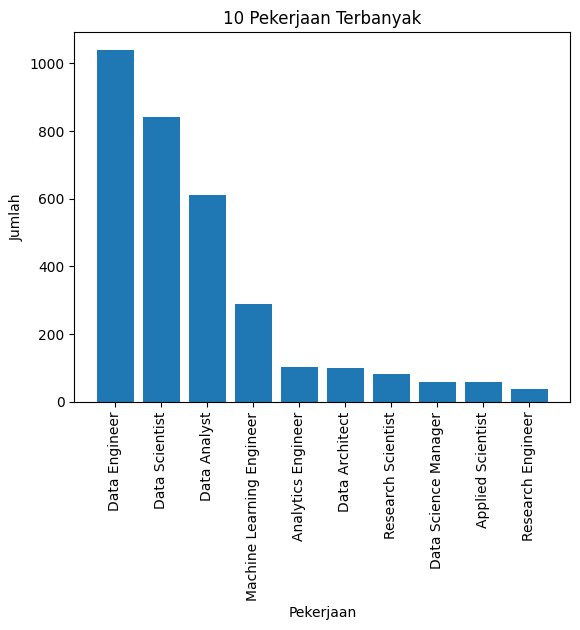

In [16]:
# Mencari profesi dengan jumlah paling banyak
pekerjaan_terbanyak = df1['pekerjaan'].value_counts()[:10]

# Plot bar chart
plt.bar(pekerjaan_terbanyak.index, pekerjaan_terbanyak.values)
plt.title('10 Pekerjaan Terbanyak')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.show()


Dari 93 data yang terdapat dataset, diagram di atas menunjukkan 10 pekerjaan terbanyak. Data Engineer, Data Scientist dan Data Analyst merupakan 3 pekerjaan dengan total pekerja terbanyak.

In [17]:
df1['employment_type'].value_counts()

Full-Time    3718
Part-Time      17
Contract       10
Freelance      10
Name: employment_type, dtype: int64

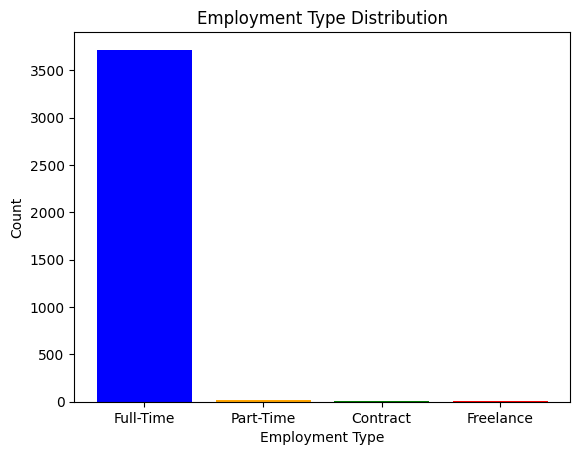

In [18]:
# Mencari tipe pekerja dengan jumlah paling banyak

terbanyak = df['employment_type'].value_counts()
emp_type = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']

plt.bar(emp_type, terbanyak.values, color=['blue', 'orange', 'green', 'red'])
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Count')


plt.show()


Terdapat 4 jenis status pekerja pada dataset. Status pekerja full-time merupakan status yang mendominasi dengan jumlah yang sangat besar dibandingkan dengan yang lainnya.

In [19]:
df1['experience_level'].value_counts()

Senior-level       2516
Mid-level           805
Entry-level         320
Executive-level     114
Name: experience_level, dtype: int64

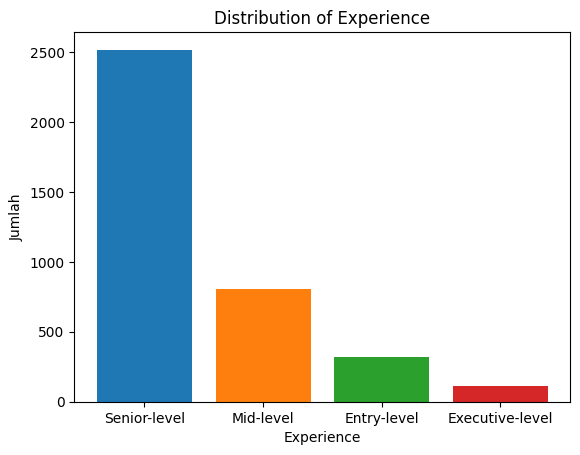

In [20]:
# Mencari distribusi pekerja berdasarkan experience
exp = df1['experience_level'].value_counts()
fig, ax = plt.subplots()
ax.bar(exp.index, exp.values, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
ax.set_xlabel('Experience')
ax.set_ylabel('Jumlah')
ax.set_title('Distribution of Experience')

plt.show()


Berdasarkan analisis diagram di atas, dapat diketahui tentang banyaknya pengalaman kerja pekerja di bidang data. Pekerja dengan level senior merupakan pekerja yang mendominasi di dalam dataset, yang selanjutnya di susul dengan pekerja dengan pengalaman mid-level.

In [21]:
df1['ukuran_perusahaan'].value_counts()

M    3153
L     454
S     148
Name: ukuran_perusahaan, dtype: int64

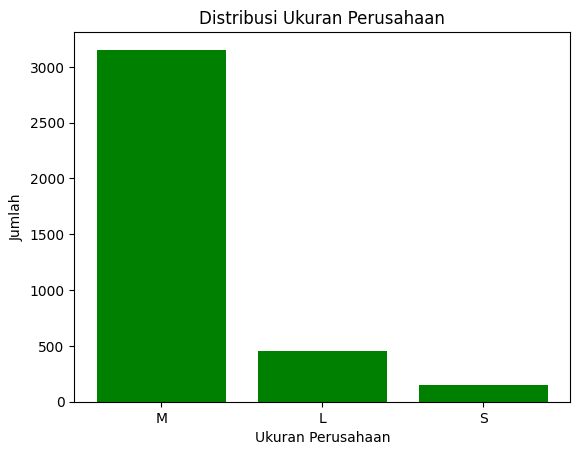

In [22]:
# Mencari distribusi ukuran perusahaan
ukuran = df1['ukuran_perusahaan'].value_counts()

plt.bar(ukuran.index, ukuran.values, color='green')
plt.xlabel('Ukuran Perusahaan')
plt.ylabel('Jumlah')
plt.title('Distribusi Ukuran Perusahaan')

plt.show()

Distribusi dari ukuran perusahaan pada dataset dapat dilihat pada diagram di atas. Perusahaan ukuran medium merupakan perusahaan bidang data yang terbanyak.

In [23]:
df1['tahun'].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: tahun, dtype: int64

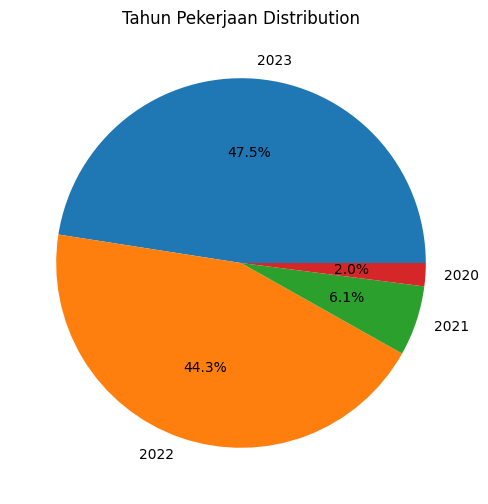

In [24]:
# Mencari Distribusi jumlah pekerja pada tahun kerja
work_year = df1['tahun'].value_counts()
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(work_year.values, labels=work_year.index, autopct='%1.1f%%')
ax.set_title('Tahun Pekerjaan Distribution')
plt.show()

In [25]:
df1['remote_ratio'].value_counts()

0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64

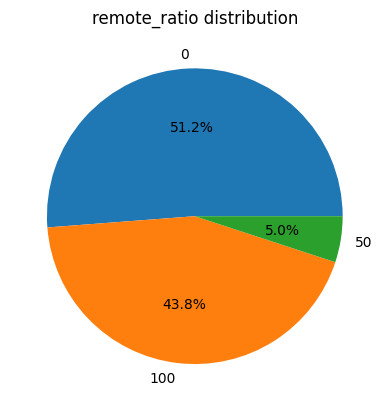

In [26]:
# Mencari distribusi dari pekerja berdasarkan remote ratio
remote_ratio = df1['remote_ratio'].value_counts()
labels = remote_ratio.index
sizes = remote_ratio.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.set_title('remote_ratio distribution')

plt.show()

Berdasarkan remote ratio diatas, dapat dilihat bahwa profesi data science cukup banyak yang bekerja secara remote dengan nilai 43.8%.

In [27]:
# Menghitung rata-rata gaji per tahunnya
avg_salary_by_work_year = df1.groupby('tahun')['gaji'].mean()
avg_salary_by_work_year

tahun
2020     92302.631579
2021     94087.208696
2022    133338.620793
2023    149045.541176
Name: gaji, dtype: float64

In [28]:
# Menghitung selisih rata-rata gaji antara satu tahun dengan tahun sebelumnya
diff_salary_by_work_year = avg_salary_by_work_year.diff()

# Menampilkan hasil
print(diff_salary_by_work_year)

tahun
2020             NaN
2021     1784.577117
2022    39251.412098
2023    15706.920383
Name: gaji, dtype: float64


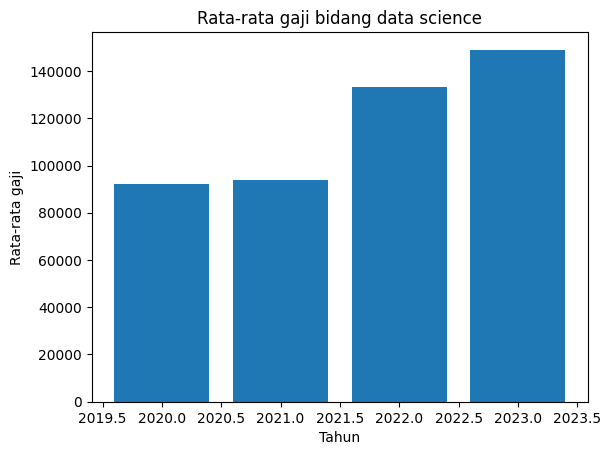

In [29]:
tahun = [int(t) for t in avg_salary_by_work_year.index]
gaji = avg_salary_by_work_year.values
plt.bar(tahun, gaji)
plt.xlabel('Tahun')
plt.ylabel('Rata-rata gaji')
plt.title('Rata-rata gaji bidang data science')
plt.show()


Berdasarkan analisis dan diagram diatas, dapat diketahui bahwa rata-rata gaji pekerja di bidang data science terus mengalami peningkatan dari tahun ke tahunnya.

In [30]:
df_job_salary = df1.groupby('pekerjaan')['gaji'].mean()
df_job_salary

pekerjaan
3D Computer Vision Researcher     21352.250000
AI Developer                     136666.090909
AI Programmer                     55000.000000
AI Scientist                     110120.875000
Analytics Engineer               152368.631068
                                     ...      
Research Engineer                163108.378378
Research Scientist               161214.195122
Software Data Engineer            62510.000000
Staff Data Analyst                15000.000000
Staff Data Scientist             105000.000000
Name: gaji, Length: 93, dtype: float64

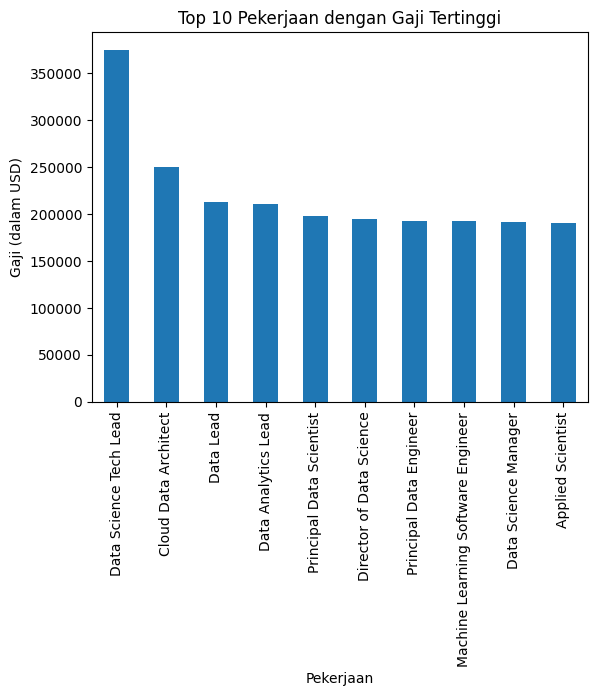

In [31]:
# urutkan berdasarkan nilai gaji dan ambil 10 teratas
top_10_job_salary = df_job_salary.sort_values(ascending=False)[:10]

# plot diagram batang
top_10_job_salary.plot(kind='bar')
plt.title('Top 10 Pekerjaan dengan Gaji Tertinggi')
plt.xlabel('Pekerjaan')
plt.ylabel('Gaji (dalam USD)')
plt.show()

Data diatas merupakan 10 profesi bidang data science dengan rata-rata gaji terbesar. Untuk rata-rata gaji yang menduduki peringkat 10 besar cenderung profesi bidang data science yang sudah ahli atau berfokus kepada bidang tertentu.

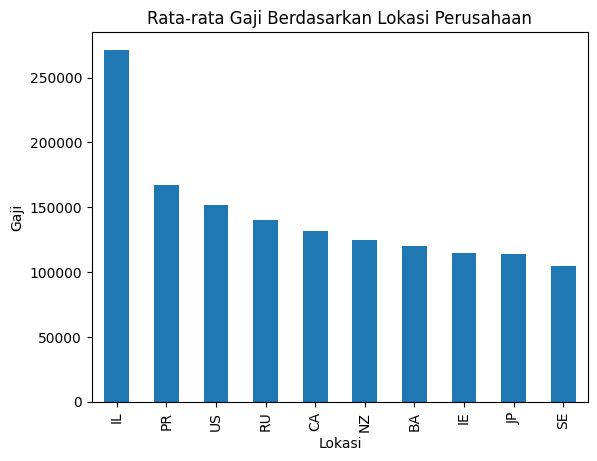

In [32]:
# group data by location and calculate the average salary
grouped_by_location = df1.groupby('lokasi')['gaji'].mean().sort_values(ascending=False)

# plot the top 10 locations with highest salary
top_10_locations = grouped_by_location[:10]
top_10_locations.plot(kind='bar')
plt.title('Rata-rata Gaji Berdasarkan Lokasi Perusahaan')
plt.xlabel('Lokasi')
plt.ylabel('Gaji')
plt.show()

### Analisis mengenai gaji dari profesi Data Scientist

Dikarenakan problem statement bertujuan khusus untuk melihat perkiraan gaji dari profesi data scientist, maka analisis selanjutnya berkonsentrasi pada data dengan profesi data scientist.

####Central tendency

In [33]:
df1

,tahun,experience_level,employment_type,pekerjaan,gaji,remote_ratio,lokasi,ukuran_perusahaan
0,2023,Senior-level,Full-Time,Principal Data Scientist,85847,100,ES,L
1,2023,Mid-level,Contract,ML Engineer,30000,100,US,S
2,2023,Mid-level,Contract,ML Engineer,25500,100,US,S
3,2023,Senior-level,Full-Time,Data Scientist,175000,100,CA,M
4,2023,Senior-level,Full-Time,Data Scientist,120000,100,CA,M
...,...,...,...,...,...,...,...,...
3750,2020,Senior-level,Full-Time,Data Scientist,412000,100,US,L
3751,2021,Mid-level,Full-Time,Principal Data Scientist,151000,100,US,L
3752,2020,Entry-level,Full-Time,Data Scientist,105000,100,US,S
3753,2020,Entry-level,Contract,Business Data Analyst,100000,100,US,L


In [34]:
# memfilter data agar hanya data dengan profesi 'Data Scientist' saja yang digunakan
df3pekerjaan = df1[(df1['pekerjaan'] == 'Data Scientist')]
df3pekerjaan

,tahun,experience_level,employment_type,pekerjaan,gaji,remote_ratio,lokasi,ukuran_perusahaan
3,2023,Senior-level,Full-Time,Data Scientist,175000,100,CA,M
4,2023,Senior-level,Full-Time,Data Scientist,120000,100,CA,M
7,2023,Senior-level,Full-Time,Data Scientist,219000,0,CA,M
8,2023,Senior-level,Full-Time,Data Scientist,141000,0,CA,M
9,2023,Senior-level,Full-Time,Data Scientist,147100,0,US,M
...,...,...,...,...,...,...,...,...
3741,2020,Mid-level,Full-Time,Data Scientist,118000,100,US,M
3742,2020,Mid-level,Full-Time,Data Scientist,138350,100,US,M
3746,2021,Mid-level,Full-Time,Data Scientist,119059,100,IL,M
3750,2020,Senior-level,Full-Time,Data Scientist,412000,100,US,L


In [35]:
# Mencari nilai terendah (min), nilai tertinggi (max), median, mean dan modus dari nilai gaji profesi Data Scientist
print(f"min gaji {df3pekerjaan['gaji'].min()}")
print(f"max gaji {df3pekerjaan['gaji'].max()}")
print(f"median gaji {df3pekerjaan['gaji'].median()}")
print(f"mean gaji {df3pekerjaan['gaji'].mean()}")
print(f"mode gaji {df3pekerjaan['gaji'].mode()[0]}")

min gaji 5679
max gaji 412000
median gaji 141525.0
mean gaji 140869.76547619049
mode gaji 140000


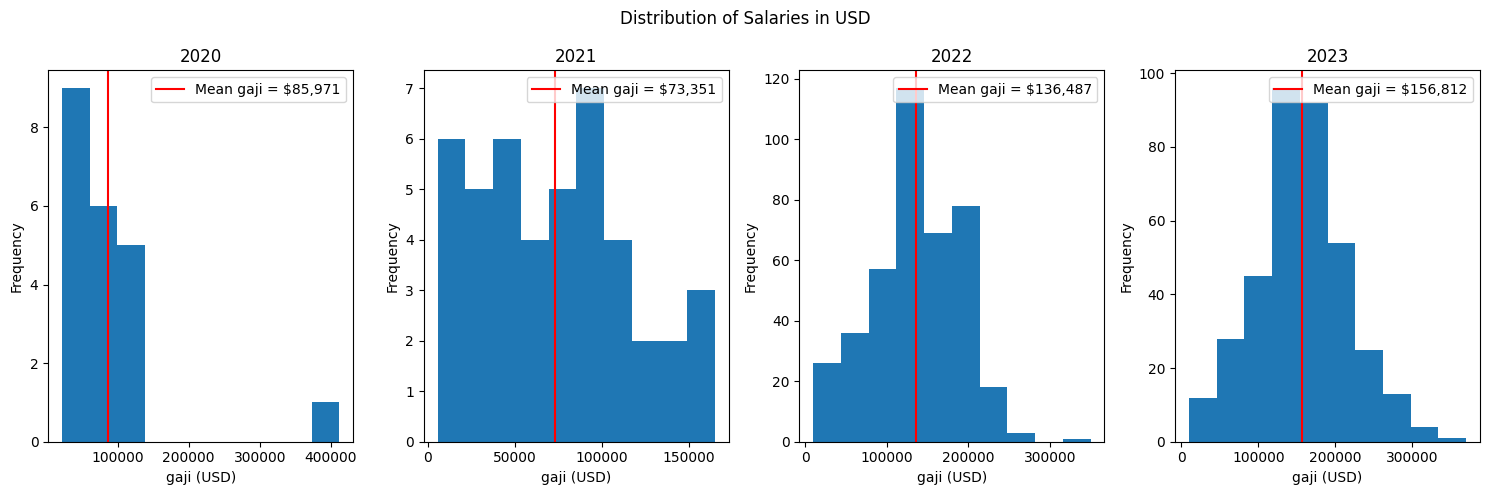

In [36]:
# Mencari trend dari gaji profesi Data Scientist
def plot_gaji_histogram_by_year(df3pekerjaan):
    fig, axs = plt.subplots(ncols=len(df3pekerjaan["tahun"].unique()), figsize=(15, 5))
    for i, year in enumerate(sorted(df3pekerjaan["tahun"].unique())):
        df = df3pekerjaan[df3pekerjaan["tahun"] == year]
        mean_gaji = df["gaji"].mean()
        axs[i].hist(df["gaji"])
        axs[i].axvline(mean_gaji, color='red', label=f"Mean gaji = ${mean_gaji:,.0f}")
        axs[i].set_xlabel("gaji (USD)")
        axs[i].set_ylabel("Frequency")
        axs[i].set_title(year)
        axs[i].legend()
    fig.suptitle("Distribution of Salaries in USD")
    plt.tight_layout()
    plt.show()

plot_gaji_histogram_by_year(df3pekerjaan)

Berdasarkan analisis diatas dapat diketahui trend dari rata-rata gaji seorang data scientist. Trend dari gaji data scientist terus mengalami kenaikan dari tahun ke tahunnya.

In [37]:
# Standar deviasi dari nilai gaji
gj=df3pekerjaan['gaji']
gj.std()

60687.45549390869

In [38]:
# Variance dari nilai gaji
gj.var()

3682967254.3251476

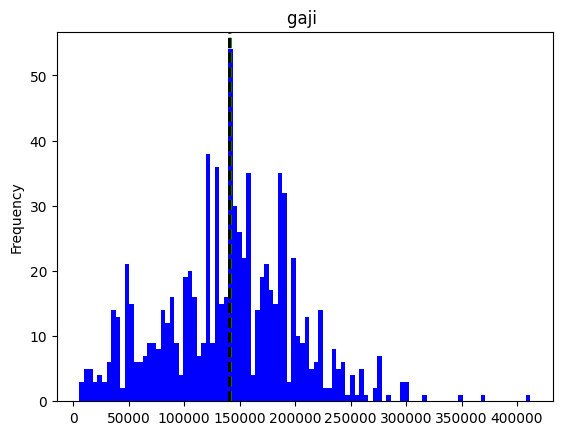

In [39]:
# Memvisualisasikan sebaran nilai gaji data scientist beserta mean, median dan modusnya
gj.plot.hist(title='gaji ', color='blue', bins=100);
plt.axvline(gj.mean(), color='red', linestyle='dashed', linewidth=2);
plt.axvline(gj.median(), color='green', linestyle='dashed', linewidth=2);
plt.axvline(gj.mode()[0], color='black', linestyle='dashed', linewidth=2);

Berdasarkan perhitungan central tendency dan visualisasi nilai data scientist, maka di dapatkan bahwa sebaran datanya condong ke kanan atau right-skewed. Distribusi data tersebut cenderung condong atau skew ke kanan, karena nilai median yang berada di atas nilai mean menunjukkan bahwa terdapat beberapa nilai ekstrem yang lebih besar dari nilai rata-rata, sehingga menggeser nilai rata-rata ke arah kanan. Metode IQR untuk menghilangkan outlier.

In [40]:
# Mencari nilai skew dan kurtosis dari gaji
num_cols = ['gaji']
for col in num_cols:
  if col == 'gaji':
    print(df3pekerjaan[col].name + ' skewness ' + str(df3pekerjaan[col].skew()))
    print(df3pekerjaan[col].name + ' kurtosis ' + str(df3pekerjaan[col].kurt()))

gaji skewness 0.18176710774623558
gaji kurtosis 0.3880692481013637


####Outlier

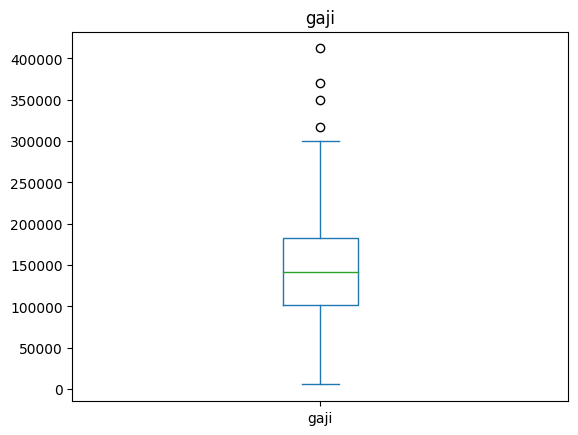

In [41]:
df3pekerjaan['gaji'].plot(kind='box', title='gaji');

Berdasarkan boxplot diatas dapat dilihat adanya outlier dari data yang akan dianalisis sehingga dibutuhkan penghilangan outlier untuk meningkatkan hasil dari analisis selanjutnya.

#### IQR (tukey rule)

IQR digunakan sebagai metode untuk mengatasi outlier karena sebaran data tidak normal.

In [42]:
df3pekerjaan.shape[0]

840

In [43]:
# Mencari upper dan lower limit
q1= df3pekerjaan['gaji'].quantile(0.25)
q3= df3pekerjaan['gaji'].quantile(0.75)
IQR= q3-q1
upper_limit= q3 + 1.5*IQR
lower_limit=q1 - 1.5*IQR

print(upper_limit)
print(lower_limit)

305323.75
-20046.25


In [44]:
# Mencari jumlah outlier pada data
outlier = df3pekerjaan[(df3pekerjaan['gaji'] > upper_limit) | (df3pekerjaan['gaji'] < lower_limit)]
outlier.shape[0]

4

Terdapat 4 outlier pada data.

In [45]:
df3pekerjaan_out = df3pekerjaan[(df3pekerjaan['gaji'] >= lower_limit) & (df3pekerjaan['gaji'] <= upper_limit)]

df3pekerjaan_out.shape[0]

836

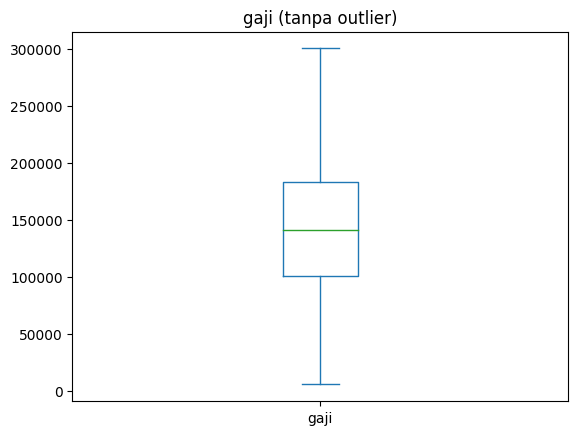

In [46]:
df3pekerjaan_out['gaji'].plot(kind='box', title='gaji (tanpa outlier)');

Boxplot diatas merupakan hasil dari boxplot dimana sudah tidak didapati lagi outlier pada data yang akan digunakan.

####confidence interval

In [47]:
# penggunaan sampel sebanyak 500 sampel secara random dari populasi data (data dengan pekerjaan 'data scientist')
sampel = df3pekerjaan['gaji'].sample(n=500, random_state=1)

print(sampel)

2354    185900
486     200000
1178    129300
2758    191475
3627    100000
         ...  
1886    190000
1100    200160
3213    140400
2885    191475
1606    200000
Name: gaji, Length: 500, dtype: int64


In [48]:
# menghitung rata-rata dan standar deviasi sampel
mean = sampel.mean()
std = sampel.std(ddof=1)

print('mean =', mean)
print('std =', std)

mean = 141485.118
std = 59736.25818465603


In [49]:
# menghitung Confidence interval dengan nilai z-score yang digunakan 95%
n = len(sampel)
se = std / np.sqrt(n)
z = stats.norm.ppf(0.975)
ci_lower = mean - z * se
ci_upper = mean + z * se

print(f'Confidence interval: [{ci_lower:.2f}, {ci_upper:.2f}]')

Confidence interval: [136249.10, 146721.14]


Confidence interval yang didapatkan senilai [136249.10, 146721.14]. Dengan nilai confidence interval tersebut maka bisa didapatkan perkiraan gaji untuk seseorang profesi data scientist pada tahun 2023 senilai 136249 sampai 146721 US dollar.

## vi. Kesimpulan

Berdasarkan hasil analisis didapati bahwa profesi di bidang data scientist didominasi dengan 3 profesi yaitu data engineer, data scientist dan data analyst. Dengan data tersebut juga dapat diketahui bahwa 3 profesi tersebut merupakan profesi dengan demand terbesar.

Melihat trend yang ada profesi di bidang data science terus mengalami kenaikan, hal tersebut juga berlaku pada profesi data scientist yang mengalami kenaikan untuk rata-rata gaji yang didapat di 3 tahun kebelakang.

Hasil analisis nilai Confidence Interval yang diperoleh dapat digunakan sebagai perkiraan untuk pekerja dengan profesi Data Scientist di tahun 2023 kedepan. Berdasarkan nilai Confidence Interval yang diperoleh maka didapati bahwa perkiraan gaji untuk seseorang profesi data scientist pada tahun 2023 senilai 136249 sampai 146721 US dollar.
